In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA, SARIMAX

In [9]:
df = pd.read_csv('data_with_indicators/btcusdt_1h_total.csv')

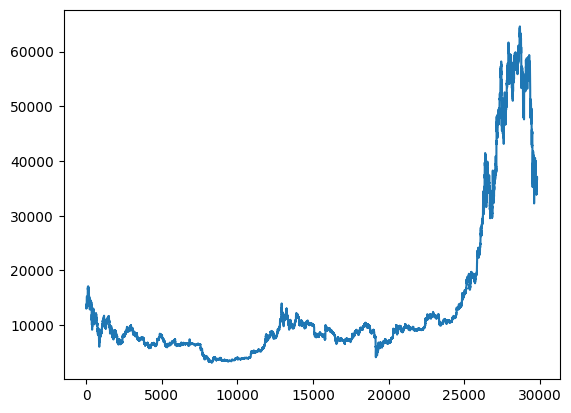

In [10]:
plt.plot(df.index, df.close)
plt.show()

In [11]:
# Train test split
to_row = int(len(df)*0.9)
training_data = list(df[to_row//2:to_row]['close'])
testing_data = list(df[to_row:]['close'])

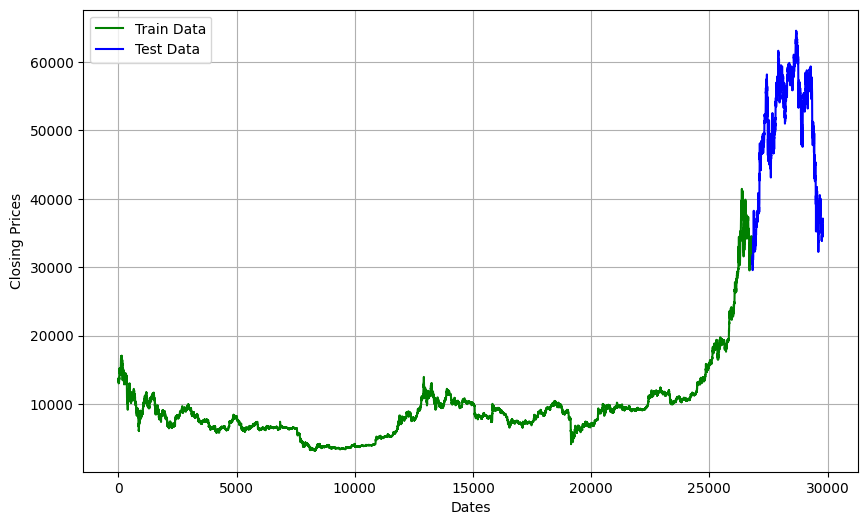

In [12]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['close'], 'green', label = 'Train Data')
plt.plot(df[to_row:]['close'], 'blue', label = 'Test Data')
plt.legend()
plt.show()

In [13]:
model_predictions = []
n_test_obser = len(testing_data)

In [14]:
print(n_test_obser)
for i in range(n_test_obser):
    print(i) if i%100 == 0 else None
    model = SARIMAX(training_data, order = (4,1,0), )
    model_fit = model.fit()
    output = model_fit.forecast()
    y_hat = output[0]
    model_predictions.append(y_hat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

2981
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


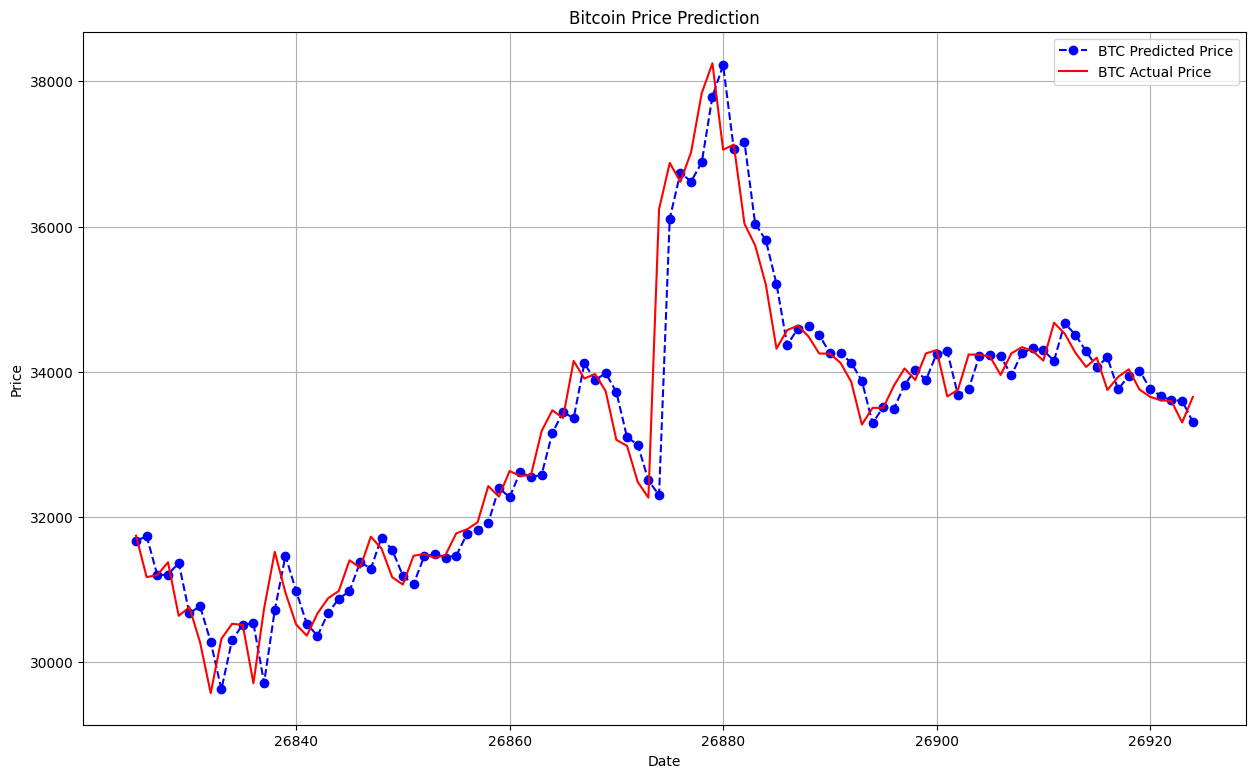

In [15]:
plt.figure(figsize = (15,9))
plt.grid(True)

date_range = df[to_row:].index

max_range = 100
plt.plot(date_range[:max_range], model_predictions[:max_range], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC Predicted Price')
plt.plot(date_range[:max_range], testing_data[:max_range], color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [16]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print(f"MAPE : {mape}")

MAPE : 0.007109515553920036
